<h1><center>Topological Data Analysis</center></h1>

![Url](https://thumbs.gfycat.com/DisgustingBlandDromedary-size_restricted.gif)

<p style="text-align: center;">Gif from: https://gfycat.com/disgustingblanddromedary</p>

### Introduction
The tools from Topological Data Analysis (TDA) emerged in response to the issues in high-dimensional data. Essentially, TDA seeks to utilize tools from topology, a brach of mathematics “concerned with the properties of a geometric object that are preserved under continuous deformations, such as stretching, twisting, crumpling and bending, but not tearing or gluing,” [1] to analyze data. How does topology relate to data analysis? TDA seeks to utilize mathematical, statistical, and algorithmic methods to make inferences and analyze the topological structure and geometric structures of data [2]. 

This notebook (and the remaining notebooks) are designed to introduce data scientists to TDA without needing a background in math.

Before exploring TDA applications, this particular notebook will cover some of the most important topics in TDA.

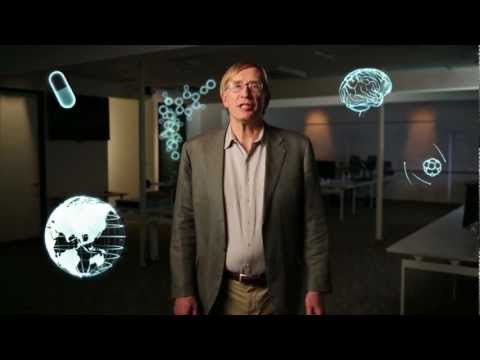

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo("XfWibrh6stw",width=640,height=360)

### Simplicial Complex

- Graph Theory
- Simplex
- Simplicial Complex

In graph theory, graphs are mathematical tools used to represent relations between objects. Graphs are composed of nodes (or points or verticies) and edges (or links or lines). More formally, 

_A graph $G = (V, E)$ consists of $V$, a nonempty set of vertices (or nodes) and $E$, a set of edges. Each edge has either one or two vertices associated with it, called its endpoints. An edge is said to connect its endpoints."_ 4

Borrowing concepts from graph theory (i.e. nodes and edges), a simplex is a generalization of a what we refer to as a tetrahedron to some arbitrary dimensions. The image below provides the first few simplicies.

<img src="https://umap-learn.readthedocs.io/en/latest/_images/simplices.png" width="50%">
<p style="text-align: center;">Image from: https://umap-learn.readthedocs.io/en/latest/how_umap_works.html/</p>

The empty set, ${\displaystyle \emptyset }$, is the -1-simplex. A node is the 0-simplex. Two nodes connected by an edge is the 1-simplex. Three nodes connected by three edges that form a triangle is the 2-simplex. A tetrahedron is the 3-simplex, and so on. A simplex of n dimensions is referred to as an n-simplex. 4. Simplicies are the building blocks of a simplicial complex. If we were to "glue" simplicies together, we form a simplicial complex.

<img src="https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0213679.g003&type=large" width="50%">
<p style="text-align: center;">Image from: https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0213679.g003</p>
<p style="text-align: center;">Caption: In (A), where ϵ is close to zero, each point is a discrete component. In (B), two points have come within ϵ and are joined by a 1-simplex. In (C), 2-simplices have formed where there are sets of three points pairwise within ϵ. Note that the upper 2-simplex connects three points whose ϵ/2-balls have no common intersection, a phenomenon possible in the Vietoris-Rips complex. At this scale a 1-dimensional hole (cycle) has formed among four of the data points. [5]</p>

After selecting some distance measure, denoted by epsilon, you draw a ball with diameter epsilon around each point. As epsilon increases, some of the balls begin to merge, which we then connect using an edge. This creates a graph. To build a simplicial complex, i.e., move away from simple graphs, we locate sets of three points that are connect by edges that create a triangle, aka the 2-simplex, and fill them in. We then fill in the three simplex and so on. The resulting simplicial complex is referred to as the Rips Complex. 

### Persistent Homology

- Homology
- Persistent Homology

Homology, in simple terms, is how we count the connected components of our simplicial complex such as the number of holes or voids (note, there is a more technical definition). 

<img src="https://storage.googleapis.com/groundai-web-prod/media/users/user_209956/project_331333/images/filtration.png" width="60%">
<p style="text-align: center;">Image from: https://www.groundai.com/project/persistent-homology-based-machine-learning-and-its-applications-a-survey/1</p>

If we apply homology to the above figure, we see that it has a central hole. Again, there is more to homology than merely counting the number of holes. However, it is not necessary to get into the techniqualites of homology in order to use TDA. 

Persistent homology is how we measure the topological features of a dataset. Put differently, "Persistent homology then captures how the homology of the complexes changes as the parameter value increases, and it detects which features ‘persist’ across changes in the parameter value." [6] If we refer back to our example of growing balls, then a 0-dimensional persistent homology measures when the balls intersect with one another. The 1-dimensional keeps track of when loops begin to form. This same thought process continues to the $n-$dimensional persistent homology, where we count the number of multidimensional voids enclosed by the balls.

The following video provides a very brief introduction to theory behind topological data analysis.

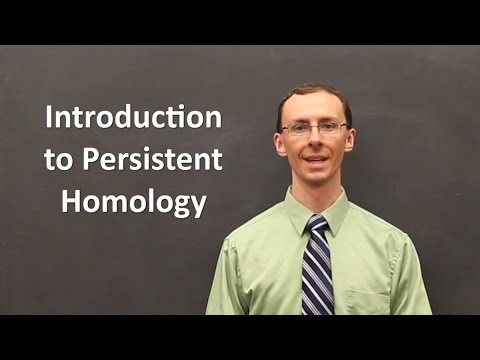

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo("2PSqWBIrn90",width=640,height=360)

### Scikit Learn TDA Package

Scikit-learn's Topological Data Analysis package, Scikit-TDA, is intended for non-topologists; that is, it is intended for all users. Scikit-TDA has five libraries:
- Ripser.py
- Kepler Mapper
- Persim
- CechMate
- TaDAsets
The two main libraries are `Ripser.py` and `Kepler Mapper`, although the remaining libraries are valuable.

### <center> Ripser</center>

<img src="http://ripser.scikit-tda.org/_static/logo.png" width="25%">

<p style="text-align: center;">Image from: http://ripser.scikit-tda.org/</p>

[Ripser](https://ripser.scikit-tda.org/) is a persistent homology package for Python. To quote Scikit-TDA,

_Ripser.py is a lean persistent homology package for Python. Building on the blazing fast C++ Ripser package as the core computational engine, Ripser.py provides an intuitive interface for_

- computing persistence cohomology of sparse and dense data sets,
- visualizing persistence diagrams,
- computing lowerstar filtrations on images, and
- computing representative cochains.

#### Ripser Parameters:
- __X__: data array
- __maxdim__: maximum homology dimension
- __thresh__: maximum distances considered when constructing filtration
- __coeff__: compute homology with coefficients in the prime field
- __distance_matrix__: indicator that X is a distance matrix
- __do_cocycles__: indicator of whether to compute cocycles
- __metric__: metric to use when calculating distance between instances in a feature array

The following code allows users to experiment with Ripser. That is, it is written to allow people to visualize how the persistence diagram will look for a specific dataset as the radius increases. 

In [2]:
from Topological_ML import tda_function as tda
import numpy as np
import scipy.spatial.distance as distance
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from IPython.display import display, clear_output
import time
from ipywidgets import interact, widgets
from ripser import ripser
from ripser import Rips
from persim import plot_diagrams
%matplotlib inline

In [3]:
# cell to do interactive plotting
n=200
theta = np.random.uniform(0, 2*np.pi, n)

# Generate radii with Gaussian noise centered at 1
r = 1 + np.random.normal(0, 0.05, n)
r[0] = 0

# Use angles and radii to generate circle 
X = r[:,np.newaxis]*np.concatenate((np.cos(theta)[:,np.newaxis], np.sin(theta)[:,np.newaxis]), axis=1)

# Compute the distance matrix for the data set X using auclidean distance.
dm_X = distance.cdist(X,X)
ind_L, cover_r = tda.uniform_sampling(dm_X, 20)

# add slider
def persistance_interact(radius = 1):
    """Used to create an interactive plot of growing radius around point and the corresponding persistence diagram.
     
    Args:      
        radius: desired radius size.
        
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.5,4.5))
    ax1.scatter(X[ind_L,0], X[ind_L,1], c='black')
    R=np.arange(0,1.5,0.1)
    for point in range(len(ind_L)):
        cir = Circle((X[ind_L[point],0], X[ind_L[point],1]),radius, color=(.5,.5,.5,0.2))
        ax1.add_patch(cir)
    ax1.set_ylim(-1-cover_r,1+cover_r)
    ax1.set_xlim(-1-cover_r,1+cover_r)
    dgms = ripser(X, maxdim=0, thresh=radius*0.5)['dgms']
    plot_diagrams(dgms, show=True, ax=ax2)
    plt.tight_layout()
    return


# define range and step for radius: from 0.0 till 0.5 (inclusive) with step 0.01
interact(persistance_interact, radius=(0.0, 1, 0.01));


interactive(children=(FloatSlider(value=1.0, description='radius', max=1.0, step=0.01), Output()), _dom_classe…

### <center>Mapper</center>

<img src="https://kepler-mapper.scikit-tda.org/_static/logo.png" width="23%">

<p style="text-align: center;">Image from: https://kepler-mapper.scikit-tda.org/</p>

[Kelper Mapper](https://kepler-mapper.scikit-tda.org/) is the Python TDA Mapper package.

To quote scikit-TDA,

_Kepler Mapper is a library implementing the Mapper algorithm in Python. Mapper can be used for visualization of the topological structures in a high-dimensional data point cloud data. Kepler Mapper leverages Scikit-Learn API compatible cluster and scaling algorithms to streamline the construction of the algorithm._

Mapper's general algorithm is as follows: 

Project a dataset $\to$ Cover this projection with overlapping intervals/hypercubes $\to$ Cluster the points inside an interval $\to$ The clusters become nodes in a graph $\to$ When there is such a member intersection, draw an edge between these nodes $\to$ Visual exploration

A more detailed explaination is offered on scikit-TDA.

#### Mapper Method:
Unlike Ripser, which is a function, Mapper is composed of several functions.
- __init__: Constructor for KeplerMapper class
- __data_from_cluster_id__: Returns the original data of each cluster member for a given cluster ID
- __fit_transform__: Same as .project() but accepts lists for arguments so you can chain.
- __map__: Apply Mapper algorithm on this projection and build a simplicial complex.
- __project__: Creates the projection/lens from a dataset.
- __visualize__: Generate a visualization of the simplicial complex mapper output.

## Additional Resource
If one is intersted in seeking additional information about TDA or would like to understand the magic behind TDA, consider watching the following YouTube videos. They are provided by [Jose Perea](https://www.joperea.com/teaching/spring2020), a professor of Mathematics at Michigan State University.

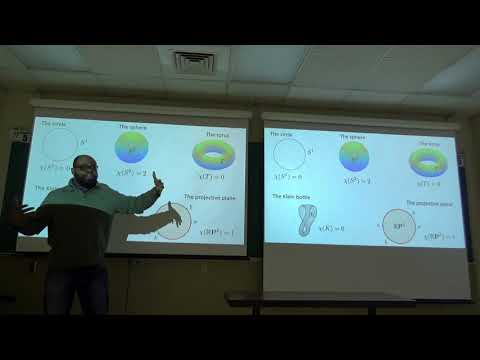

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("BDQDpdTc-A4",width=640,height=360)

### References

[1] https://en.wikipedia.org/wiki/Topology

[2] https://arxiv.org/abs/1710.04019

[3] http://www.diva-portal.org/smash/get/diva2:900997/FULLTEXT01.pdf

[4] https://www.projectrhea.org/rhea/index.php/Walther375Spring2014_Simplicial_complexes:_higher_dimensional_versions_of_graphs

[5] https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0213679.g003

[6] https://epjdatascience.springeropen.com/articles/10.1140/epjds/s13688-017-0109-5